In [1]:
!pip install rasterio


In [1]:
import rasterio
import numpy as np

tif_path = "./Grandvillers-2025-07-30.tif"   #2025-04-30  #2025-06-04  #2025-07-30

with rasterio.open(tif_path) as src:
    data = src.read()          # 读取所有波段
    profile = src.profile      # 元数据
    transform = src.transform
    crs = src.crs
    nodata = src.nodata

print("data shape:", data.shape)
print("dtype:", data.dtype)
print("CRS:", crs)
print("nodata:", nodata)


data shape: (11, 7643, 11179)
dtype: uint16
CRS: EPSG:4326
nodata: None


In [2]:
with rasterio.open(tif_path) as src:
    print(src.descriptions)


('Blue-444', 'Blue', 'Green-531', 'Green', 'Red-650', 'Red', 'Red edge-705', 'Red edge', 'Red edge-740', 'NIR', 'Alpha')


In [3]:
# NDVI=(NIR-Red)/(NIR+Red)
with rasterio.open(tif_path) as src:
    data = src.read().astype(np.float32)

red = data[5]   # Band 6: Red
nir = data[9]   # Band 10: NIR

ndvi = (nir - red) / (nir + red + 1e-6)

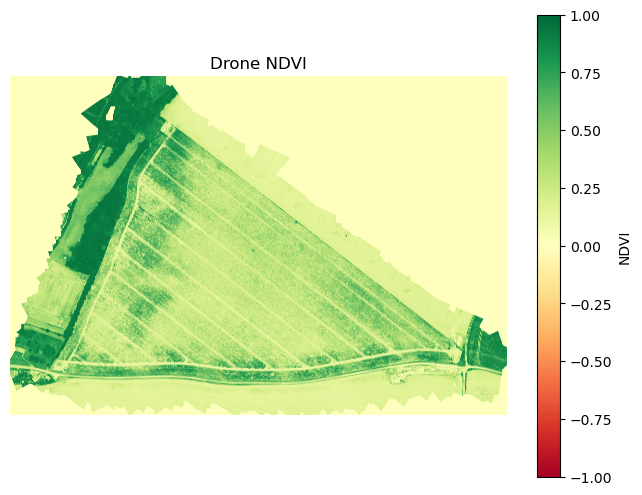

In [4]:
mask = (nir == 0) | (red == 0)
ndvi[mask] = np.nan

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI")
plt.title("Drone NDVI")
plt.axis("off")
plt.show()


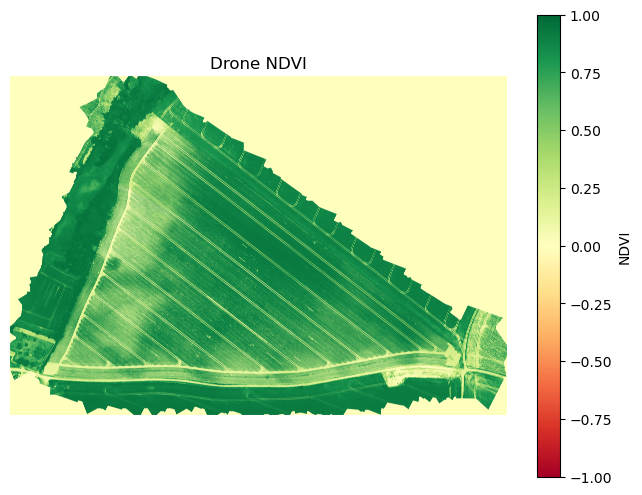

In [21]:
mask = (nir == 0) | (red == 0)
ndvi[mask] = np.nan

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.imshow(ndvi, cmap="RdYlGn", vmin=-1, vmax=1)
plt.colorbar(label="NDVI")
plt.title("Drone NDVI")
plt.axis("off")
plt.show()
